In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_titanic=pd.read_csv("titanic_dataset.csv")
df_titanic
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_titanic=pd.DataFrame(data=df_titanic)

In [3]:
df_titanic.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Eklund, Mr. Hans Linus",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

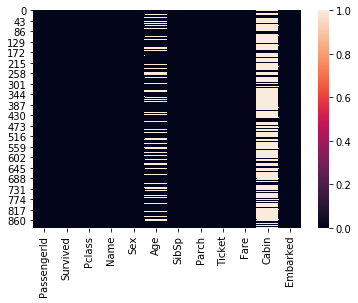

In [6]:
sns.heatmap(df_titanic.isnull())

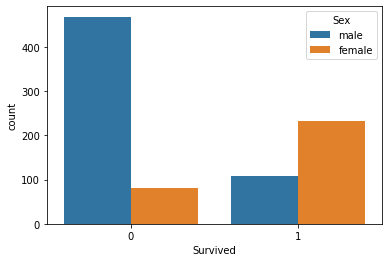

In [7]:
sns.countplot(x="Survived",hue="Sex",data=df_titanic)

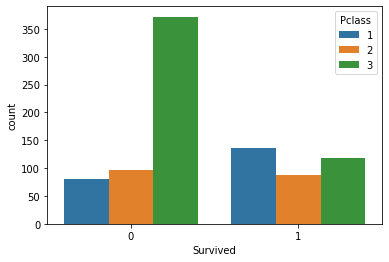

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=df_titanic)

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
df_titanic['Age']=imp.fit_transform(df_titanic['Age'].values.reshape(-1,1))

In [10]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_titanic.drop('Cabin',axis=1,inplace=True)

In [12]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [13]:
embark=pd.get_dummies(df_titanic['Embarked'])
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [14]:
sex=pd.get_dummies(df_titanic['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
df_titanic.drop(["Sex","Embarked","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [16]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [17]:
df_titanic=pd.concat([df_titanic,sex,embark],axis=1)

In [18]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
from scipy.stats import zscore
z_score=abs(zscore(df_titanic))
print(df_titanic.shape)
df_titanic_final=df_titanic[(z_score<3).all(axis=1)]
print(df_titanic_final.shape)

(891, 11)
(749, 11)


In [20]:
x=df_titanic.drop(["Survived"],axis=1)
y=df_titanic[["Survived"]]

In [21]:
x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [22]:
y=y.values.reshape(-1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22)

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred=lr.predict(x_test)

In [27]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("accuracy score: ",accuracy_score(pred,y_test))
print("confusion_matrix: \n",confusion_matrix(pred,y_test))
print("classification_report: ",classification_report(pred,y_test))


accuracy score:  0.8071065989847716
confusion_matrix: 
 [[100  21]
 [ 17  59]]
classification_report:                precision    recall  f1-score   support

           0       0.85      0.83      0.84       121
           1       0.74      0.78      0.76        76

    accuracy                           0.81       197
   macro avg       0.80      0.80      0.80       197
weighted avg       0.81      0.81      0.81       197



In [29]:
def algo(alg,x,y):
    max_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        a_scr=accuracy_score(pred,y_test)
        if a_scr>max_score:
            max_score=a_scr
            final_r_state=r_state
    print()
    print("max accuracy score of ",alg,"at random state",final_r_state,"is",max_score)
    return final_r_state

In [30]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
model=[lr,svc,gnb,dtc,knn]
for m in model:
    rstate=algo(m,x,y)


max accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) at random state 45 is 0.8435754189944135

max accuracy score of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) at random state 71 is 0.7653631284916201

max accuracy score of  GaussianNB(priors=None, var_smoothing=1e-09) at random state 76 is 0.8491620111731844

max accuracy score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
      

In [31]:
from sklearn.metrics import roc_auc_score
lauc_score=roc_auc_score(y_test,lr.predict(x_test))
svc_auc_score=roc_auc_score(y_test,svc.predict(x_test))
dtc_auc_score=roc_auc_score(y_test,dtc.predict(x_test))
knn_auc_score=roc_auc_score(y_test,knn.predict(x_test))
gnb_auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print("auc score for logistic regression:",lauc_score)
print("auc score for svc:",svc_auc_score)
print("auc score for decision tree classifer:",dtc_auc_score)
print("auc score for KNN classifierr:",knn_auc_score)
print("auc score for gaussianNB:",gnb_auc_score)


auc score for logistic regression: 0.7832799145299145
auc score for svc: 0.6138354700854701
auc score for decision tree classifer: 0.9641559829059829
auc score for KNN classifierr: 0.7625534188034189
auc score for gaussianNB: 0.7724358974358976


In [32]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()
dtg = GridSearchCV(dtc, tree_para, cv=5)
dtg.fit(x,y)
dtg.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [33]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)
rstate=algo(dtc,x,y)


max accuracy score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') at random state 56 is 0.8603351955307262


In [34]:
neighnors={"n_neighbors":range(1,30)}
knn=KNeighborsClassifier()
gknr=GridSearchCV(knn,neighnors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 17}

In [35]:
knn=KNeighborsClassifier(n_neighbors=17)
rstate=algo(knn,x,y)


max accuracy score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform') at random state 73 is 0.7821229050279329


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingClassifier()
param={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,150,200],"init":[svc,dtc,knn,gnb,lr]}
ggb=GridSearchCV(gbr,param,cv=10)
ggb.fit(x,y)
ggb.best_params_

{'init': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=3, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [37]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingClassifier(init=dtc,learning_rate=0.1,n_estimators=200)
print("mean score for gradient boosting classifier",cross_val_score(gbr,x,y,cv=5,scoring="balanced_accuracy").mean())
print("STD score for gradient boosting classifier",cross_val_score(gbr,x,y,cv=5,scoring="balanced_accuracy").std())

mean score for gradient boosting classifier 0.8067467561416268
STD score for gradient boosting classifier 0.021785958366969713


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls=AdaBoostClassifier()
param={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,150,200],"base_estimator":[svc,dtc,knn,knn,lr]}
ags=GridSearchCV(ada_cls,param,cv=10)
ags.fit(x,y)
ags.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=3, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 200}

In [40]:
ada_cls=AdaBoostClassifier(base_estimator=dtc,learning_rate=0.01,n_estimators=200)
print("mean score for AdaBoostClassifier",cross_val_score(ada_cls,x,y,cv=5,scoring="balanced_accuracy").mean())
print("STD score for AdaBoostClassifier",cross_val_score(ada_cls,x,y,cv=5,scoring="balanced_accuracy").std())    

mean score for AdaBoostClassifier 0.7961814370742314
STD score for AdaBoostClassifier 0.031599456233352634


In [41]:
rstate=algo(gbr,x,y)


max accuracy score of  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecat

In [42]:
rstate=algo(ada_cls,x,y)


max accuracy score of  AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',

In [43]:
#gradientboosting giving us high accuracy score of all methods
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=.22)
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("accuracy score: ",accuracy_score(pred,y_test))
print("confusion_matrix: \n",confusion_matrix(pred,y_test))
print("classification_report: ",classification_report(pred,y_test))


accuracy score:  0.8883248730964467
confusion_matrix: 
 [[110  14]
 [  8  65]]
classification_report:                precision    recall  f1-score   support

           0       0.93      0.89      0.91       124
           1       0.82      0.89      0.86        73

    accuracy                           0.89       197
   macro avg       0.88      0.89      0.88       197
weighted avg       0.89      0.89      0.89       197



In [44]:
from sklearn.externals import joblib
joblib.dump(gbr,"ada.titanic.pkl")

['ada.titanic.pkl']